# KNN

## 导入相关库

In [1]:
from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

## 数据预处理过程

In [2]:
# 数据读取
data = pd.read_csv('data.csv')
# 定义特征列 标签列
c = ['二氧化硅(SiO2)', '氧化钠(Na2O)',
     '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
     '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
     '氧化锡(SnO2)', '二氧化硫(SO2)']
X = data[c].values
y = data['类型'].values
# 使用train_test_split划分进训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2003)  # 设定随机种子

## 实现KNN具体细节

In [3]:
def euc_dis(instance1, instance2):
    """
    计算两个样本instance1和instance2之间的欧式距离
    instance1: 第一个样本， array型
    instance2: 第二个样本， array型
    """
    # your code
    return np.sqrt(sum((instance1 - instance2) ** 2))


def knn_classify(X, y, testInstance, k):
    """
    给定一个测试数据testInstance, 通过KNN算法来预测它的标签。 
    X: 训练数据的特征
    y: 训练数据的标签
    testInstance: 测试数据，这里假定一个测试数据 array型
    k: 选择多少个neighbors? 
    """
    # your code  返回testInstance的预测标签
    distances = [euc_dis(x, testInstance) for x in X]
    kneighbors = np.argsort(distances)[:k]
    count = Counter(y[kneighbors])
    return count.most_common()[0][0]



## 预测结果、及准确率计算

In [4]:
# 预测结果。
K = 3
predictions = [knn_classify(X_train, y_train, data, K) for data in X_test]
print("预测结果为：", predictions)
print("实际结果为：", list(y_test))

# 准确率计算
correct = np.count_nonzero((predictions == y_test) == True)
print("Accuracy is: %.3f" % (correct / len(X_test)))

预测结果为： ['铅钡', '铅钡', '铅钡', '高钾', '铅钡', '高钾', '铅钡', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡', '高钾', '高钾', '高钾']
实际结果为： ['铅钡', '铅钡', '铅钡', '高钾', '铅钡', '高钾', '铅钡', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡', '高钾', '高钾', '高钾']
Accuracy is: 1.000


# 决策树

In [15]:
import pandas as pd
from sklearn import tree  #导入模块
# 读取附件的表单1与表单2
# your code
import openpyxl

In [16]:
data1 = pd.read_excel('FJ.xlsx', sheet_name='表单1')
data1.head(5)

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [17]:
# 为减少难度，将表单2数据中的空值设为0
# your code
data2 = pd.read_excel('FJ.xlsx', sheet_name='表单2')
# 空值
data2 = data2.fillna(0)
data2.head(5)

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [18]:
# 各成分比例的累加和应为 100%，但因检测手段等原因可能导致其成分比例的累加和非100%的情况。本题中将成分比例累加和介于 85%~105%之间的数据视为有效数据。
# 提取有效数据
# your code
data2 = data2[(data2['二氧化硅(SiO2)'] + data2['氧化钠(Na2O)'] + data2['氧化钾(K2O)'] + data2['氧化钙(CaO)'] + data2[
    '氧化镁(MgO)'] + data2['氧化铝(Al2O3)'] + data2['氧化铁(Fe2O3)'] + data2['氧化铜(CuO)'] + data2['氧化铅(PbO)'] +
               data2['氧化钡(BaO)'] + data2['五氧化二磷(P2O5)'] + data2['氧化锶(SrO)'] + data2['氧化锡(SnO2)'] + data2[
                   '二氧化硫(SO2)']) >= 85]
data2 = data2[(data2['二氧化硅(SiO2)'] + data2['氧化钠(Na2O)'] + data2['氧化钾(K2O)'] + data2['氧化钙(CaO)'] + data2[
    '氧化镁(MgO)'] + data2['氧化铝(Al2O3)'] + data2['氧化铁(Fe2O3)'] + data2['氧化铜(CuO)'] + data2['氧化铅(PbO)'] +
               data2['氧化钡(BaO)'] + data2['五氧化二磷(P2O5)'] + data2['氧化锶(SrO)'] + data2['氧化锡(SnO2)'] + data2[
                   '二氧化硫(SO2)']) <= 105]
data2.head(5)

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [19]:
data2.tail(5)

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
64,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.0
65,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.0
66,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.0
67,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.0
68,58,30.39,0.00,0.34,3.49,0.79,3.52,0.86,3.13,39.35,7.66,8.99,0.24,0.0,0.0


In [51]:
# 将表单1与表单2联合，以便后续分析。为减少难度，表单2中的文物采样点只考虑编号，不考虑状态，如“42未风化点1”视为42，“43部位1”视为43。
# your code
data2['文物采样点'] = data2['文物采样点'].apply(lambda x: x[:2])
df = pd.concat([data1, data2], axis=1)
df.head(5)

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1.0,C,高钾,蓝绿,无风化,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2.0,A,铅钡,浅蓝,风化,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3.0,A,高钾,蓝绿,无风化,03,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,4.0,A,高钾,蓝绿,无风化,03,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,5.0,A,高钾,蓝绿,无风化,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


- [一小时实践入门 Graphviz](https://zhuanlan.zhihu.com/p/644358139)

In [ ]:
df['类型'] = df['类型'].apply(lambda x: 1 if x == '高钾' else 2 if x == '铅钡' else 0)

In [40]:
import graphviz

# 选取各个化学成分作为决策特征
c = ['二氧化硅(SiO2)', '氧化钠(Na2O)',
     '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
     '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
     '氧化锡(SnO2)', '二氧化硫(SO2)']

# 导入graphviz包，实例化决策树模型，并将表中的每种化学成分输入作为决策特征，将玻璃的类型作为分类特征输入决策树中，并利用graphviz进行可视化
# your code

# 实例化
clf = tree.DecisionTreeClassifier()
# 训练
clf.fit(df[c], df['类型'])

DecisionTreeClassifier()

[Text(0.6086956521739131, 0.21428571428571427, 'x[9] <= 9.215\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.5652173913043478, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.6521739130434783, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.7391304347826086, 0.35714285714285715, 'x[10] <= 2.19\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.6956521739130435, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.782608695652174, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.9130434782608695, 0.6428571428571429, 'x[10] <= 6.045\ngini = 0.204\nsamples = 26\nvalue = [3, 0, 23]'),
 Text(0.8695652173913043, 0.5, 'x[1] <= 2.685\ngini = 0.147\nsamples = 25\nvalue = [2, 0, 23]'),
 Text(0.8260869565217391, 0.35714285714285715, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]'),
 Text(0.9130434782608695, 0.35714285714285715, 'x[1] <= 3.05\ngini = 0.408\nsamples = 7\nvalue = [2

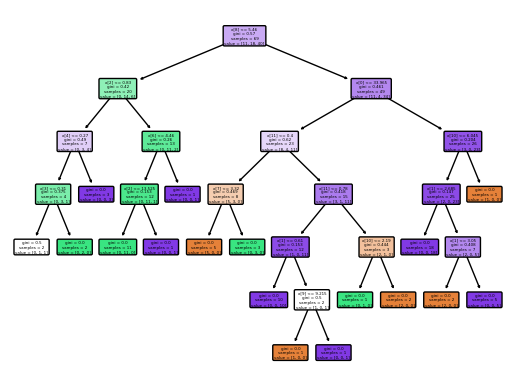

In [46]:
# 可视化
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=c,
                                class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# SVM

In [58]:
# 为减少难度，去除表单2中采样点未风化的数据，并将两个表单做联合 质疑: 去除之后都没有两个类别了
# your code 
df.head(5)

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1.0,C,1,蓝绿,无风化,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2.0,A,2,浅蓝,风化,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3.0,A,1,蓝绿,无风化,03,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,4.0,A,1,蓝绿,无风化,03,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,5.0,A,1,蓝绿,无风化,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [57]:
from sklearn.svm import SVC

# 导入SVM包，实列化SVM模型并对数据进行训练。
# df为上一步中联合后的数据[请根据实际处理过程修改]，取前30个数据为训练集，其余数据为测试集
train = df[:30]
test = df[30:]
# 训练模型，其中各化学成分为训练特征，文物是否风化为分类特征，并输出训练分数
# your code
clf = SVC()
clf.fit(train[c], train['表面风化'])  # x是特征，y是标签

SVC()

In [59]:
from sklearn.svm import SVC

# 导入SVM包，实列化SVM模型并对数据进行训练。
# df为上一步中联合后的数据[请根据实际处理过程修改]，取前30个数据为训练集，其余数据为测试集
train = df[:30]
test = df[30:]
# 训练模型，其中各化学成分为训练特征，文物是否风化为分类特征，并输出训练分数
# your code
clf = SVC()
clf.fit(train[c], train['表面风化'])
clf.score(train[c], train['表面风化'])


0.7333333333333333

In [60]:
# 打印出测试集的实际标签与预测得出的标签
# your code
clf.predict(test[c])
print("预测为：", clf.predict(test[c]))
print("实际为：", list(test['表面风化']))

预测为： ['无风化' '无风化' '无风化' '风化' '风化' '无风化' '无风化' '无风化' '风化' '风化' '风化' '风化' '风化'
 '风化' '风化' '风化' '风化' '风化' '风化' '风化' '无风化' '风化' '风化' '风化' '风化' '风化' '风化'
 '风化' '风化' '风化' '风化' '风化' '无风化' '风化' '风化' '风化' '风化' '风化' '风化']
实际为： ['无风化', '无风化', '无风化', '风化', '无风化', '风化', '无风化', '风化', '风化', '风化', '风化', '风化', '风化', '风化', '无风化', '无风化', '无风化', '风化', '风化', '风化', '风化', '风化', '风化', '风化', '无风化', '风化', '风化', '风化', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


####  END by M7|YYC 2023/11/22